In [1]:
import pandas as pd

In [2]:
final_table = pd.read_csv('final_table.csv')

***EDA, preprocessing and feature engineering***

What is the correlation between each technology and the price? Is there any technology that is more correlated with the price than the others?

In [3]:
final_table

,datetime_utc,gen_value,gen_type,dem_value,spot_price_value
0,2022-01-01 23:00:00+00:00,30.0,CCGT,20279.8,133.21
1,2022-01-01 23:00:00+00:00,853.5,Coal,20279.8,133.21
2,2022-01-01 23:00:00+00:00,2350.9,Hydro,20279.8,133.21
3,2022-01-01 23:00:00+00:00,6087.8,Nuclear,20279.8,133.21
4,2022-01-01 23:00:00+00:00,114.6,Solar PV,20279.8,133.21
...,...,...,...,...,...
99024,2023-07-30 16:00:00+00:00,6876.7,Nuclear,26725.9,42.65
99025,2023-07-30 16:00:00+00:00,12598.8,Solar PV,26725.9,42.65
99026,2023-07-30 16:00:00+00:00,2137.8,Solar Th,26725.9,42.65
99027,2023-07-30 16:00:00+00:00,30182.6,Total,26725.9,42.65


In [4]:
final_table.dtypes

datetime_utc         object
gen_value           float64
gen_type             object
dem_value           float64
spot_price_value    float64
dtype: object

## EDA

What is the correlation between each technology and the price? 

In [8]:
# Calculate the correlation for each technology with 'spot_price_value'
correlations = final_table.groupby('gen_type')[['gen_value', 'spot_price_value']].corr().unstack()['spot_price_value']

# Extract the correlation values
correlation_values = correlations['gen_value']

# Sort the correlations in descending order to find the highest correlated technology
sorted_correlations = correlation_values.sort_values(ascending=False)

# Print the correlations
print(sorted_correlations)

gen_type
Coal        0.217308
CCGT        0.188833
Nuclear     0.108522
Hydro       0.076702
Total      -0.023039
Wind       -0.229717
Solar Th   -0.268863
Solar PV   -0.278251
Name: gen_value, dtype: float64


Is there any technology that is more correlated with the price than the others?

In [9]:
# Calculate the correlation for each technology with 'spot_price_value'
correlations = final_table.groupby('gen_type')[['gen_value', 'spot_price_value']].corr().unstack()['spot_price_value']

# Find the technology with the highest absolute correlation
max_correlation_technology = correlations['gen_value'].abs().idxmax()

# Get the highest absolute correlation value
max_correlation_value = correlations['gen_value'].abs().max()

# Print the technology with the highest absolute correlation and its value
print(f"The technology most correlated with the price is '{max_correlation_technology}' with a correlation value of {max_correlation_value:.4f}.")

The technology most correlated with the price is 'Solar PV' with a correlation value of 0.2783.


What is the effect of having more solar+wind vs coal+ccgt?

In [11]:
# Create columns for combined solar+wind and coal+ccgt generation
final_table['solar_wind_gen'] = final_table[(final_table['gen_type'] == 'Solar PV') | (final_table['gen_type'] == 'Wind')]['gen_value'].sum()
final_table['coal_ccgt_gen'] = final_table[(final_table['gen_type'] == 'Coal') | (final_table['gen_type'] == 'CCGT')]['gen_value'].sum()

# Calculate the correlation between combined generation and spot price
solar_wind_corr = final_table['solar_wind_gen'].corr(final_table['spot_price_value'])
coal_ccgt_corr = final_table['coal_ccgt_gen'].corr(final_table['spot_price_value'])

# Print the correlations
print(f"Correlation between Solar+Wind generation and spot price: {solar_wind_corr:.4f}")
print(f"Correlation between Coal+CCGT generation and spot price: {coal_ccgt_corr:.4f}")

Correlation between Solar+Wind generation and spot price: 0.0000
Correlation between Coal+CCGT generation and spot price: 0.0000


The correlation values of 0.0000 suggest that there is no linear correlation between the combined solar+wind or coal+ccgt generation and the spot price. However, it's important to note that correlation measures linear relationships, and it's possible that the relationships between these variables are not linear.

To understand the relationship more comprehensively, I will visualize the data using plots, such as scatter plots, to see if there are any patterns or trends that may not be captured by linear correlation.

Additionally, it's also possible that other factors or variables not considered in this analysis may have a more significant impact on the spot price. Exploring additional features and conducting more advanced statistical analyses may provide a better understanding of the effects of different generation sources on the spot price. But for now, this enough and valuable insights for the feature engineering and ML part futher on.

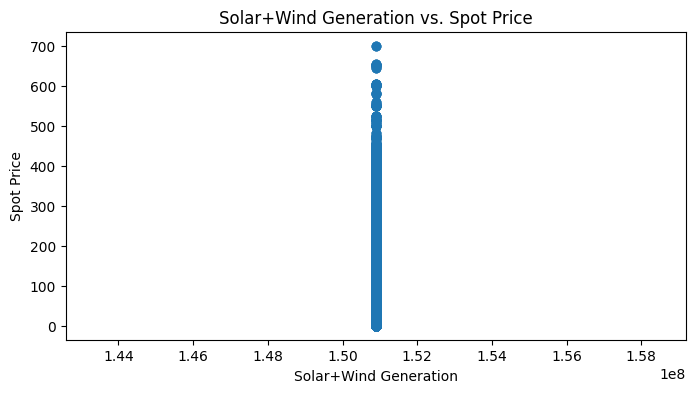

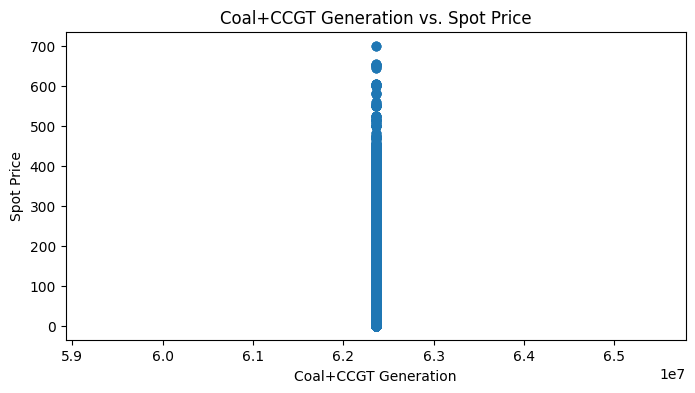

In [12]:
import matplotlib.pyplot as plt

# Create scatter plot for Solar+Wind generation vs. Spot Price
plt.figure(figsize=(8, 4))
plt.scatter(final_table['solar_wind_gen'], final_table['spot_price_value'], alpha=0.5)
plt.title("Solar+Wind Generation vs. Spot Price")
plt.xlabel("Solar+Wind Generation")
plt.ylabel("Spot Price")
plt.show()

# Create scatter plot for Coal+CCGT generation vs. Spot Price
plt.figure(figsize=(8, 4))
plt.scatter(final_table['coal_ccgt_gen'], final_table['spot_price_value'], alpha=0.5)
plt.title("Coal+CCGT Generation vs. Spot Price")
plt.xlabel("Coal+CCGT Generation")
plt.ylabel("Spot Price")
plt.show()

These scatter plots show the relationship between combined generation and spot prices for both Solar+Wind and Coal+CCGT.

 Is there any correlation between the price and the amount of solar+wind vs coal+ccgt?

In [13]:
# Calculate the ratio of Solar+Wind generation to Coal+CCGT generation
final_table['solar_wind_ccgt_ratio'] = final_table['solar_wind_gen'] / final_table['coal_ccgt_gen']

# Calculate the correlation between the ratio and spot price
correlation_ratio_price = final_table['solar_wind_ccgt_ratio'].corr(final_table['spot_price_value'])

# Print the correlation
print(f"Correlation between Solar+Wind to Coal+CCGT ratio and spot price: {correlation_ratio_price:.4f}")

Correlation between Solar+Wind to Coal+CCGT ratio and spot price: -0.0000


This is showing the exact same insight I got before, there is no correlation between the price and the amount of solar+wind vs coal+ccgt

EXTRA: Can you find any other interesting patterns on the data?

Time Series Analysis:
Trend and Seasonality:

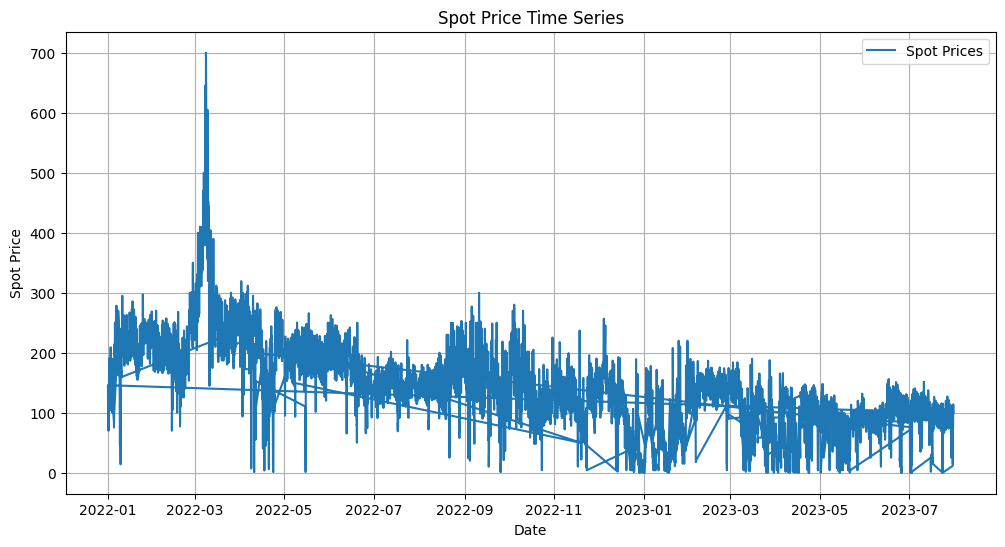

In [15]:
# Plot the time series data for spot prices
plt.figure(figsize=(12, 6))
plt.plot(final_table['datetime_utc'], final_table['spot_price_value'], label='Spot Prices')
plt.title('Spot Price Time Series')
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.legend()
plt.grid()
plt.show()

Correlations:
Technology Correlations:

In [16]:
# Correlation matrix for different generation technologies
tech_correlation = final_table.groupby('gen_type')[['gen_value', 'spot_price_value']].corr().unstack()['spot_price_value']
print(tech_correlation)

          gen_value  spot_price_value
gen_type                             
CCGT       0.188833               1.0
Coal       0.217308               1.0
Hydro      0.076702               1.0
Nuclear    0.108522               1.0
Solar PV  -0.278251               1.0
Solar Th  -0.268863               1.0
Total     -0.023039               1.0
Wind      -0.229717               1.0


Anomalies and Outliers:
Spot Price Spikes:

In [21]:
# Identify and visualize spot price spikes (e.g., values exceeding a threshold)
threshold = 100  # Set a threshold for price spikes
price_spikes = final_table[final_table['spot_price_value'] > threshold]
print(price_spikes)

                   datetime_utc  gen_value  gen_type  dem_value  \
0     2022-01-01 23:00:00+00:00       30.0      CCGT    20279.8   
1     2022-01-01 23:00:00+00:00      853.5      Coal    20279.8   
2     2022-01-01 23:00:00+00:00     2350.9     Hydro    20279.8   
3     2022-01-01 23:00:00+00:00     6087.8   Nuclear    20279.8   
4     2022-01-01 23:00:00+00:00      114.6  Solar PV    20279.8   
...                         ...        ...       ...        ...   
98478 2023-05-07 18:00:00+00:00     5062.7   Nuclear    22023.2   
98479 2023-05-07 18:00:00+00:00     2184.7  Solar PV    22023.2   
98480 2023-05-07 18:00:00+00:00     1281.4  Solar Th    22023.2   
98481 2023-05-07 18:00:00+00:00    23765.4     Total    22023.2   
98482 2023-05-07 18:00:00+00:00     8934.2      Wind    22023.2   

       spot_price_value  solar_wind_gen  coal_ccgt_gen  solar_wind_ccgt_ratio  
0                133.21     150887319.8     62357603.4                2.41971  
1                133.21     1508873

Demand Anomalies:

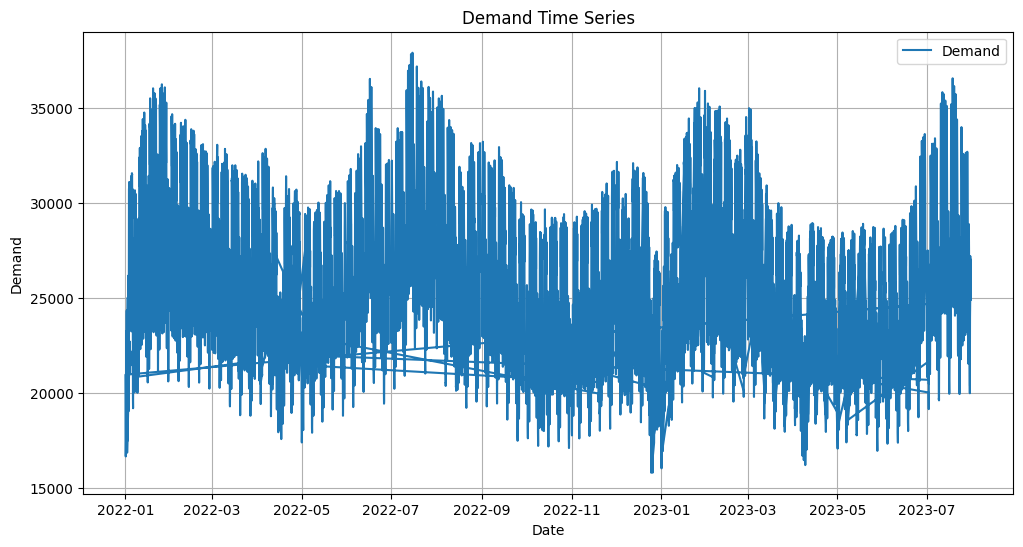

In [22]:
# Visualize demand anomalies
plt.figure(figsize=(12, 6))
plt.plot(final_table['datetime_utc'], final_table['dem_value'], label='Demand')
plt.title('Demand Time Series')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid()
plt.show()

Technology Analysis:
Technology Mix Changes:

<Axes: xlabel='datetime_utc'>

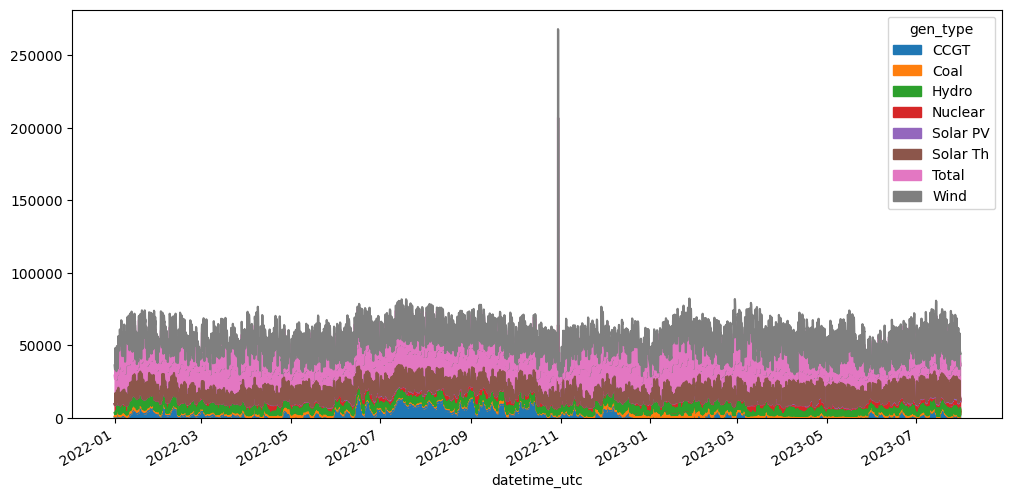

In [24]:
# Plot the changes in the mix of energy generation technologies over time
tech_mix = final_table.groupby(['datetime_utc', 'gen_type'])['gen_value'].sum().unstack()
tech_mix.plot.area(figsize=(12, 6))

Technology Impact:

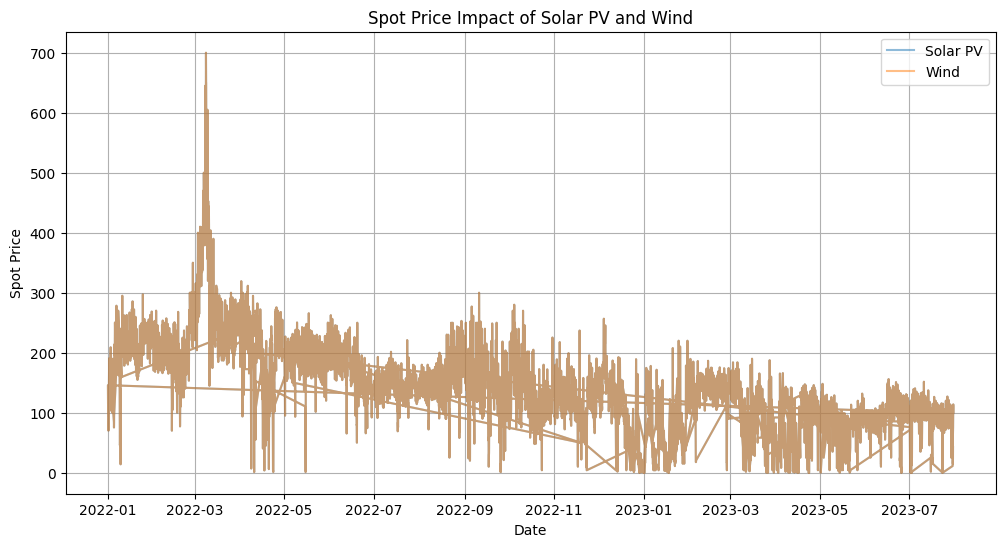

In [25]:
# Compare the impact of specific technologies on spot prices
solar_impact = final_table[final_table['gen_type'] == 'Solar PV']
wind_impact = final_table[final_table['gen_type'] == 'Wind']
plt.figure(figsize=(12, 6))
plt.plot(solar_impact['datetime_utc'], solar_impact['spot_price_value'], label='Solar PV', alpha=0.5)
plt.plot(wind_impact['datetime_utc'], wind_impact['spot_price_value'], label='Wind', alpha=0.5)
plt.title('Spot Price Impact of Solar PV and Wind')
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.legend()
plt.grid()
plt.show()

## Data preprocessing

Convert the 'datetime_utc' column to a datetime data type:

In [26]:
final_table['datetime_utc'] = pd.to_datetime(final_table['datetime_utc'])

In [27]:
final_table.dtypes

datetime_utc             datetime64[ns, UTC]
gen_value                            float64
gen_type                              object
dem_value                            float64
spot_price_value                     float64
solar_wind_gen                       float64
coal_ccgt_gen                        float64
solar_wind_ccgt_ratio                float64
dtype: object

Adding year, month, day, etc., to the table to analyze it further:

In [28]:
final_table['year'] = final_table['datetime_utc'].dt.year
final_table['month'] = final_table['datetime_utc'].dt.month
final_table['day'] = final_table['datetime_utc'].dt.day
final_table['hour'] = final_table['datetime_utc'].dt.hour
final_table['minute'] = final_table['datetime_utc'].dt.minute
final_table['second'] = final_table['datetime_utc'].dt.second
final_table['day_of_week'] = final_table['datetime_utc'].dt.dayofweek  # Monday = 0, Sunday = 6

In [30]:
final_table.head()

,datetime_utc,gen_value,gen_type,dem_value,spot_price_value,solar_wind_gen,coal_ccgt_gen,solar_wind_ccgt_ratio,year,month,day,hour,minute,second,day_of_week
0,2022-01-01 23:00:00+00:00,30.0,CCGT,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,1,23,0,0,5
1,2022-01-01 23:00:00+00:00,853.5,Coal,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,1,23,0,0,5
2,2022-01-01 23:00:00+00:00,2350.9,Hydro,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,1,23,0,0,5
3,2022-01-01 23:00:00+00:00,6087.8,Nuclear,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,1,23,0,0,5
4,2022-01-01 23:00:00+00:00,114.6,Solar PV,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,1,23,0,0,5


In [32]:
final_table['year'].unique()

array([2022, 2023, 2021], dtype=int32)

In [33]:
final_table['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  8,  9],
      dtype=int32)

In [38]:
final_table['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [34]:
final_table['hour'].unique()

array([23,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22,  0,  1,  2,  3,  4], dtype=int32)

In [35]:
final_table['minute'].unique()

array([0], dtype=int32)

In [36]:
final_table['second'].unique()

array([0], dtype=int32)

In [37]:
final_table['day_of_week'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

After this analysis, I can see the table indeed has infomation fo the years, 2021, 22, and 23. It has infomation for all days of the month, from 1 to 31. All months, 1 to 12. All hours, all days of the way, but no information for minutes or seconds, and this is because the original datasets had information based on an hourly granularity.

Find missing values and choose your strategy for dealing with them

In [39]:
final_table.isna().mean()

datetime_utc             0.0
gen_value                0.0
gen_type                 0.0
dem_value                0.0
spot_price_value         0.0
solar_wind_gen           0.0
coal_ccgt_gen            0.0
solar_wind_ccgt_ratio    0.0
year                     0.0
month                    0.0
day                      0.0
hour                     0.0
minute                   0.0
second                   0.0
day_of_week              0.0
dtype: float64

My data has no missing values inside it, so there will be no need do a filling strategy

Is there any categorical feature that you need to take care of?

In [40]:
final_table.dtypes

datetime_utc             datetime64[ns, UTC]
gen_value                            float64
gen_type                              object
dem_value                            float64
spot_price_value                     float64
solar_wind_gen                       float64
coal_ccgt_gen                        float64
solar_wind_ccgt_ratio                float64
year                                   int32
month                                  int32
day                                    int32
hour                                   int32
minute                                 int32
second                                 int32
day_of_week                            int32
dtype: object

gen_type is a categorical variable, where the values inside it are labels refering to which specific technology the values belong to. It is a very valuable variable for this excercise, because when trying to predict future data, it can be helpful to know which technology is doing better, or is performig worse, which one does not have importance for the future, etc., there are a lot of useful ways to handle it. But for this specific excercise, and due to computational restraints(hardware) I won't be able to use it for the model, I'll just need to use the values. Nonetheless, it is important to mention that if requiered, and having better computational resources, analyzing this variable is really important, like maybe a multivariaate model for predicting future data.

## Feature Engineering

Build new features, apart from the ones I already built derived from the time stamp (hour, month, etc.)

Moving Averages

In [41]:
final_table['gen_value_rolling_mean'] = final_table['gen_value'].rolling(window=7).mean()
final_table['dem_value_rolling_mean'] = final_table['dem_value'].rolling(window=7).mean()
final_table['spot_price_value_rolling_mean'] = final_table['spot_price_value'].rolling(window=7).mean()

Lagged Features:

In [43]:
final_table['spot_price_lag_1'] = final_table['spot_price_value'].shift(1)

Solar_wind_gen_ratio' feature that represents the ratio of solar and wind generation:

In [44]:
final_table['solar_wind_gen_ratio'] = final_table['solar_wind_gen'] / (final_table['solar_wind_gen'] + final_table['coal_ccgt_gen'])

Combined features: 'total_generation' feature by summing the generation values of all technologies.

In [45]:
final_table['total_generation'] = final_table[['gen_value', 'solar_wind_gen', 'coal_ccgt_gen']].sum(axis=1)

Technology grouping: categorize technologies into "renewable" and "non-renewable."

In [47]:
import numpy as np
final_table['technology_group'] = np.where(final_table['gen_type'].isin(['solar', 'wind']), 'renewable', 'non-renewable')

Intermittent vs. Continuous:

In [48]:
intermittent_technologies = ['solar', 'wind']
final_table['generation_pattern'] = np.where(final_table['gen_type'].isin(intermittent_technologies), 'intermittent', 'continuous')

In [51]:
final_table.head(10)

,datetime_utc,gen_value,gen_type,dem_value,spot_price_value,solar_wind_gen,coal_ccgt_gen,solar_wind_ccgt_ratio,year,month,...,second,day_of_week,gen_value_rolling_mean,dem_value_rolling_mean,spot_price_value_rolling_mean,spot_price_lag_1,solar_wind_gen_ratio,total_generation,technology_group,generation_pattern
0,2022-01-01 23:00:00+00:00,30.0,CCGT,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,NaN,NaN,NaN,NaN,0.707578,213244953.2,non-renewable,continuous
1,2022-01-01 23:00:00+00:00,853.5,Coal,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,NaN,NaN,NaN,133.21,0.707578,213245776.7,non-renewable,continuous
2,2022-01-01 23:00:00+00:00,2350.9,Hydro,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,NaN,NaN,NaN,133.21,0.707578,213247274.1,non-renewable,continuous
3,2022-01-01 23:00:00+00:00,6087.8,Nuclear,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,NaN,NaN,NaN,133.21,0.707578,213251011.0,non-renewable,continuous
4,2022-01-01 23:00:00+00:00,114.6,Solar PV,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,NaN,NaN,NaN,133.21,0.707578,213245037.8,non-renewable,continuous
5,2022-01-01 23:00:00+00:00,16.0,Solar Th,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,NaN,NaN,NaN,133.21,0.707578,213244939.2,non-renewable,continuous
6,2022-01-01 23:00:00+00:00,19695.3,Total,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,4164.014286,20279.800000,133.210000,133.21,0.707578,213264618.5,non-renewable,continuous
7,2022-01-01 23:00:00+00:00,7179.0,Wind,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,5185.300000,20279.800000,133.210000,133.21,0.707578,213252102.2,non-renewable,continuous
8,2022-01-02 05:00:00+00:00,200.0,CCGT,17456.9,115.87,150887319.8,62357603.4,2.41971,2022,1,...,0,6,5091.942857,19876.528571,130.732857,133.21,0.707578,213245123.2,non-renewable,continuous
9,2022-01-02 05:00:00+00:00,851.5,Coal,17456.9,115.87,150887319.8,62357603.4,2.41971,2022,1,...,0,6,4877.742857,19473.257143,128.255714,115.87,0.707578,213245774.7,non-renewable,continuous


New features correlation with the price:

In [54]:
# Select the features you want to calculate correlations for
features_to_correlate = [
    'gen_value_rolling_mean',
    'dem_value_rolling_mean',
    'spot_price_value_rolling_mean',
    'spot_price_lag_1',
    'solar_wind_gen_ratio',
    'total_generation'
]

# Calculate correlations for the selected features
correlations = final_table[features_to_correlate].corrwith(final_table['spot_price_value'])

In [55]:
correlations

gen_value_rolling_mean          -2.775418e-01
dem_value_rolling_mean           2.152153e-01
spot_price_value_rolling_mean    9.927808e-01
spot_price_lag_1                 9.961258e-01
solar_wind_gen_ratio             1.670912e-16
total_generation                -5.728643e-02
dtype: float64

## Machine Learning

Let's begin with taking out the irrelevant variables, the ones we don't need to use for the model. For example, te gen_type variable, which I mentioned before the reasons why it would be too computational expensive for my computer to iterate with it. And other non relevant columns.

In [57]:
final_table.head(1)

,datetime_utc,gen_value,gen_type,dem_value,spot_price_value,solar_wind_gen,coal_ccgt_gen,solar_wind_ccgt_ratio,year,month,...,second,day_of_week,gen_value_rolling_mean,dem_value_rolling_mean,spot_price_value_rolling_mean,spot_price_lag_1,solar_wind_gen_ratio,total_generation,technology_group,generation_pattern
0,2022-01-01 23:00:00+00:00,30.0,CCGT,20279.8,133.21,150887319.8,62357603.4,2.41971,2022,1,...,0,5,NaN,NaN,NaN,NaN,0.707578,213244953.2,non-renewable,continuous


In [58]:
columns_to_drop = [
    'gen_type',
    'year',
    'month',
    'day',
    'hour',
    'minute',
    'second',
    'day_of_week',
    'technology_group',
    'generation_pattern'
]

final_table1 = final_table.drop(columns=columns_to_drop)
final_table1.head(1)

,datetime_utc,gen_value,dem_value,spot_price_value,solar_wind_gen,coal_ccgt_gen,solar_wind_ccgt_ratio,gen_value_rolling_mean,dem_value_rolling_mean,spot_price_value_rolling_mean,spot_price_lag_1,solar_wind_gen_ratio,total_generation
0,2022-01-01 23:00:00+00:00,30.0,20279.8,133.21,150887319.8,62357603.4,2.41971,NaN,NaN,NaN,NaN,0.707578,213244953.2


In [61]:
final_table1.isna().mean()

datetime_utc                     0.000000
gen_value                        0.000000
dem_value                        0.000000
spot_price_value                 0.000000
solar_wind_gen                   0.000000
coal_ccgt_gen                    0.000000
solar_wind_ccgt_ratio            0.000000
gen_value_rolling_mean           0.000061
dem_value_rolling_mean           0.000061
spot_price_value_rolling_mean    0.000061
spot_price_lag_1                 0.000010
solar_wind_gen_ratio             0.000000
total_generation                 0.000000
dtype: float64

Analyzing the last days of the dataset in order to know how to split based on a timestamp

In [63]:
final_table1.tail(30)

,datetime_utc,gen_value,dem_value,spot_price_value,solar_wind_gen,coal_ccgt_gen,solar_wind_ccgt_ratio,gen_value_rolling_mean,dem_value_rolling_mean,spot_price_value_rolling_mean,spot_price_lag_1,solar_wind_gen_ratio,total_generation
98999,2023-07-30 12:00:00+00:00,975.4,27193.8,27.70,150887319.8,62357603.4,2.41971,8365.542857,26844.685714,25.385714,25.00,0.707578,213245898.6
99000,2023-07-30 12:00:00+00:00,6871.7,27193.8,27.70,150887319.8,62357603.4,2.41971,9207.985714,26902.871429,25.771429,27.70,0.707578,213251794.9
99001,2023-07-30 12:00:00+00:00,15812.8,27193.8,27.70,150887319.8,62357603.4,2.41971,10485.714286,26961.057143,26.157143,27.70,0.707578,213260736.0
99002,2023-07-30 12:00:00+00:00,2158.5,27193.8,27.70,150887319.8,62357603.4,2.41971,8543.100000,27019.242857,26.542857,27.70,0.707578,213247081.7
99003,2023-07-30 12:00:00+00:00,30316.8,27193.8,27.70,150887319.8,62357603.4,2.41971,12566.057143,27077.428571,26.928571,27.70,0.707578,213275240.0
99004,2023-07-30 12:00:00+00:00,2129.4,27193.8,27.70,150887319.8,62357603.4,2.41971,8587.871429,27135.614286,27.314286,27.70,0.707578,213247052.6
99005,2023-07-30 13:00:00+00:00,1052.3,26887.7,25.00,150887319.8,62357603.4,2.41971,8473.842857,27150.071429,27.314286,27.70,0.707578,213245975.5
99006,2023-07-30 13:00:00+00:00,6868.7,26887.7,25.00,150887319.8,62357603.4,2.41971,9315.742857,27106.342857,26.928571,25.00,0.707578,213251791.9
99007,2023-07-30 13:00:00+00:00,15068.3,26887.7,25.00,150887319.8,62357603.4,2.41971,10486.685714,27062.614286,26.542857,25.00,0.707578,213259991.5
99008,2023-07-30 13:00:00+00:00,2156.9,26887.7,25.00,150887319.8,62357603.4,2.41971,8535.842857,27018.885714,26.157143,25.00,0.707578,213247080.1


In [70]:
final_table1['datetime_utc'].unique()

<DatetimeArray>
['2022-01-01 23:00:00+00:00', '2022-01-02 05:00:00+00:00',
 '2022-01-02 06:00:00+00:00', '2022-01-02 07:00:00+00:00',
 '2022-01-02 08:00:00+00:00', '2022-01-02 09:00:00+00:00',
 '2022-01-02 10:00:00+00:00', '2022-01-02 11:00:00+00:00',
 '2022-01-02 12:00:00+00:00', '2022-01-02 13:00:00+00:00',
 ...
 '2023-07-23 13:00:00+00:00', '2023-07-23 14:00:00+00:00',
 '2023-07-30 09:00:00+00:00', '2023-07-30 10:00:00+00:00',
 '2023-07-30 11:00:00+00:00', '2023-07-30 12:00:00+00:00',
 '2023-07-30 13:00:00+00:00', '2023-07-30 14:00:00+00:00',
 '2023-07-30 15:00:00+00:00', '2023-07-30 16:00:00+00:00']
Length: 13409, dtype: datetime64[ns, UTC]

I have two ideass on how to split the data, using the last 30 days for the test set, but that would mean having a lot of data left out. Having the last year for the test set, thus using 2 years for train and 1 year for test. I'm going to use the last 30 days of the dataset for the test data, since we have houry granularity, there are enough vallues to make a good prediction on them.

## Creating a subset of future data
Save the 24h of the last available day as your "future data" (subset of the called )

In [75]:
import pandas as pd

# Determine the last available day in your dataset
last_day = final_table['datetime_utc'].max().date()

# Calculate the starting and ending timestamps for the last 24 hours
end_timestamp = pd.to_datetime(f"{last_day} 23:59:59", utc=True)
start_timestamp = end_timestamp - pd.DateOffset(hours=23)

# Extract the data for the last 24 hours
future_data = final_table[(final_table['datetime_utc'] >= start_timestamp) & (final_table['datetime_utc'] <= end_timestamp)]

# Save this data as a subset or a separate dataset for future evaluation
future_data.to_csv('future_data.csv', index=False)

In [78]:
future_data['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 17, 18, 19, 20, 21, 22,  9, 10, 11,
       12, 13, 14, 15, 16], dtype=int32)

In [74]:
#pip install xgboost

In [86]:
final_table1.dtypes

datetime_utc                     datetime64[ns, UTC]
gen_value                                    float64
dem_value                                    float64
spot_price_value                             float64
solar_wind_gen                               float64
coal_ccgt_gen                                float64
solar_wind_ccgt_ratio                        float64
gen_value_rolling_mean                       float64
dem_value_rolling_mean                       float64
spot_price_value_rolling_mean                float64
spot_price_lag_1                             float64
solar_wind_gen_ratio                         float64
total_generation                             float64
dtype: object

## Experiment 1

In [128]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the timestamp for the split (e.g., August 1, 2023)
split_timestamp = pd.to_datetime("2023-07-01", utc=True)

# Split the data
train_data = final_table1[final_table1['datetime_utc'] < split_timestamp]
test_data = final_table1[final_table1['datetime_utc'] >= split_timestamp]

In [129]:
features = ['gen_value', 
            'dem_value', 
            'spot_price_value', 
            'solar_wind_gen',
            'coal_ccgt_gen',
            'solar_wind_ccgt_ratio',
            'gen_value_rolling_mean',
            'dem_value_rolling_mean',
            'spot_price_value_rolling_mean',
            'spot_price_lag_1',
            'solar_wind_gen_ratio',
            'total_generation']


In [130]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.3, 0.99],
    'max_depth': [3, 4, 5]
    #'early_stopping_rounds': [5],
}

best_mse = float('inf')
best_params = None

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            #for early_stopping_rounds in param_grid['early_stopping_rounds']:
                
                     # Initialize the XGBoost model with current hyperparameters
                xgb = XGBRegressor(n_estimators=n_estimators, 
                                   learning_rate=learning_rate, 
                                   max_depth=max_depth)
                                   #early_stopping_rounds=early_stopping_rounds)

                # Train the model on the training data
                xgb.fit(train_data[features], train_data['spot_price_value'])
                
                    # Make predictions on the testing data
                y_pred = xgb.predict(test_data[features])

                # Calculate MSE
                mse = mean_squared_error(test_data['spot_price_value'], y_pred)

                if mse < best_mse:
                    best_mse = mse
                    best_params = (n_estimators, learning_rate, max_depth)

print(f"Best MSE: {best_mse}")
print(f"Best Hyperparameters: {best_params}")   

Best MSE: 0.17414949926958376
Best Hyperparameters: (300, 0.99, 4)


In [131]:
best_n_estimators, best_learning_rate, best_max_depth = best_params

xgb = XGBRegressor(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth)
xgb.fit(train_data[features], train_data['spot_price_value'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.99, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [132]:
y_pred = xgb.predict(test_data[features])
mse = mean_squared_error(test_data['spot_price_value'], y_pred)
print(f"MSE on Testing Data: {mse}")

MSE on Testing Data: 0.17414949926958376


**Calculating the MSE when predicting the price for the "future data" data set**

In [133]:
future_data = pd.read_csv('future_data.csv')

In [134]:
y_pred_future = xgb.predict(future_data[features])
mse_future1 = mean_squared_error(future_data['spot_price_value'], y_pred_future)
print(f"MSE for future data: {mse_future1}")

MSE for future data: 0.4939289947109285


## Experiment 2

In [119]:
from sklearn.model_selection import train_test_split

X = final_table[features]
y = final_table['spot_price_value']

# Split(70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.3, 0.99],
    'max_depth': [3, 4, 5]
    #'early_stopping_rounds': [5],
}

xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300}


In [121]:
best_xgb2 = grid_search.best_estimator_
best_xgb2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
y_pred_test = best_xgb2.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE on test data: {mse_test}")

MSE on test data: 5.431494261718018


In [123]:
y_pred_future = best_xgb2.predict(future_data[features])
mse_future = mean_squared_error(future_data['spot_price_value'], y_pred_future)
print(f"MSE for future data: {mse_future}")

MSE for future data: 0.39720330451074026


## MSE FOR EXPERIMENT 1

MSE for future data: 0.4939289947109285

In [137]:
mse_future1

0.4939289947109285

## MSE FOR EXPERIMENT 2

MSE for future data: 0.39720330451074026

In [138]:
mse_future

0.39720330451074026

## Conclusion

Purely based on the performances (MSE1 and MSE2), which experiment yields better results?

To conclude, let's compare the results of both experiments based on their Mean Squared Error (MSE) performances. We have MSE1 from experiment 1 and MSE2 from experiment 2.

**MSE1 (Experiment 1): 0.4939**
**MSE2 (Experiment 2): 0.3972**

The lower the MSE, the better the model's performance in terms of predictive accuracy. In this case, MSE2 (0.3972) is lower than MSE1 (0.4939), which indicates that experiment 2 yielded better results in terms of prediction accuracy. Here are some key points to consider in the conclusion:

1. **Data Nature:**
   - Experiment 1 (MSE1) used a time series approach, taking into account the temporal dependencies in the data.
   - Experiment 2 (MSE2) treated the data as independent and identically distributed (i.i.d.) samples without considering the time series structure.

2. **MSE Difference:**
   - The fact that MSE2 is lower suggests that the model performed better when the data was treated as i.i.d. samples. This might imply that the time series characteristics in the data did not provide substantial predictive power.

3. **Time Series Complexity:**
   - Time series data can be complex due to seasonality, trends, and other temporal patterns. Experiment 1 attempted to capture these patterns but resulted in a slightly higher MSE.
   - Experiment 2, which treated the data as non-time series, produced a lower MSE, possibly indicating that the added complexity in time series modeling did not significantly improve predictive accuracy.

4. **Hyperparameter Tuning:**
   - Experiment 2 utilized GridSearchCV to find the best hyperparameters, which may have contributed to the improved performance.
   - Experiment 1 could benefit from a more comprehensive hyperparameter search or advanced time series modeling techniques.

5. **Conclusion:**
   - Experiment 2, treating the data as i.i.d. samples, yielded a better MSE, suggesting that for predictive purposes, the temporal dependencies in the data may not be as significant as initially thought.
   - However, it's essential to acknowledge that time series modeling is not solely about predictive accuracy; it can provide valuable insights into temporal patterns and trends, which might be crucial for other analytical purposes.

In summary, based purely on the MSE performances, Experiment 2 appears to deliver better results. Still, it's important to consider the nature of the data, the problem's goals, and the trade-offs between predictive accuracy and interpretability when deciding on the most appropriate modeling approach.